University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing impact of gain classes

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys

from tueplots import bundles
from tueplots.constants.color import rgb
from tueplots import cycler, markers
from tueplots.constants import markers as marker_constants
from tueplots.constants.color import palettes

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

# Import data

In [2]:
gain_dict = read_data('../dat/results/exp_006/', compare_gains=True)
dict_mean_delays = get_mean_delays(gain_dict, 60, True, True)
for key in dict_mean_delays.keys():
    dict_mean_delays[key]['switch_times'] = np.arange(1, 61)

avg_gain
avg_pos_gain
no_wait
theoretical_max_gain
zero_gain


## Plot

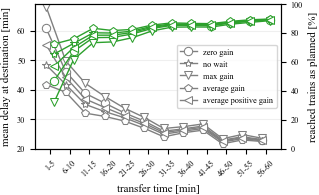

In [4]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update(cycler.cycler(marker=marker_constants.o_sized[:5]))
plt.rcParams.update(markers.inverted())
plt.rcParams['font.serif'] = 'Times New Roman'  
plt.rcParams['font.family'] = 'serif'


group_size = 5  # set group size 

# FIGURE ------------------------------

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


keys_string = ['zero gain', 'no wait', 'max gain', 'average gain', 'average positive gain']

width = 0.3

max_grouped_meand_delays = []


# iterate over gain assumptions
for key, df in dict_mean_delays.items():

    m = list(dict_mean_delays.keys()).index(key) # iterate markers
    

    grouped_mean_delays = []
    #grouped_median_delays = []
    grouped_reachable1 = []
    grouped_reachable2 = []
    grouped_reachable3 = []

    for i in range(0, len(df.switch_times), group_size):
        group_sum_mean_delays = np.sum(df.mean_delay[i:i+group_size])
        grouped_mean_delays.append(group_sum_mean_delays)


        group_sum_reachable1 = np.sum(df.reachable1[i:i+group_size])
        grouped_reachable1.append(group_sum_reachable1)

        group_sum_reachable2 = np.sum(df.reachable2[i:i+group_size])
        grouped_reachable2.append(group_sum_reachable2)

        group_sum_reachable3 = np.sum(df.reachable3[i:i+group_size])
        grouped_reachable3.append(group_sum_reachable3)



    #print(len(grouped_mean_delays))
    max_grouped_meand_delays.append(max(grouped_mean_delays)/group_size)
    x = np.arange(len(grouped_mean_delays))

    l1 = ax1.plot(x+1-0.2, np.array(grouped_mean_delays)/group_size, color="grey", label=keys_string[m], linewidth=1) 

    
    bottom = np.zeros(len(grouped_mean_delays))

    reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
    bar1 = np.array(grouped_reachable1)/reachables_total*100
    bar2 = np.array(grouped_reachable2)/reachables_total*100
    bar3 = np.array(grouped_reachable3)/reachables_total*100


    l2 = ax2.plot(x+1+0.2, bar3, color="#2CA02C", label=keys_string[m], linewidth=1) 

    m = m+1



ax1.set_xlabel('transfer time [min]')
ax1.set_ylabel('mean delay at destination [min]')
xticks_array =  [f'{start}-{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x+1, xticks_array, rotation=45)
#ax1.set_yticks(y_ticks_array)
ax1.set_ylim([20, math.ceil(max(max_grouped_meand_delays))])
ax1.yaxis.grid("major", alpha=0.2)


ax2.set_ylabel("reached trains as planned [%]")
ax2.set_ylim([0,100])

# Solution for having two legends
bars1, labels1 = ax1.get_legend_handles_labels()
#bars2, labels2 = ax2.get_legend_handles_labels()


#legend = ax2.legend([bars1[0], bars2[0]], [labels1[0], labels2[0]], loc="lower left")
legend = ax2.legend(bars1, labels1, loc="center right", labelcolor="black")
for lh in legend.legend_handles:
    lh.set_alpha(1.0)

    


plt.savefig("plot_meanDelay_gain.pdf", format="pdf")

plt.show()